# <center>INFO-F422: Statistical foundations of machine learning</center>

# <center>Project I. Regression</center>

Student: Hongxing NIU

Matricule ULB: 000342366

Specialized Master in data science, Big data (MS-BGDA), Université Libre de Bruxelles

Python version: 3.6

Date: June-6,2019

## <center>Part I. Synthetic data sets</center>

#### In this part, I train a LinearRegression, LogisticRegression and GradientBoostingRegressor to synthetic data sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model


### 1. Run linear least squares regression and plot the result


Define Numpy arrays that correspond to the following training data:

$$
X = \begin{bmatrix}
1 & -2.2\\
1 & -0.3\\
1 &  1.5\\
1 &  4.8
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
-1.2 \\
1.5\\
4.2\\
5.3
\end{bmatrix}
$$

The scikit-learn package provides a **LinearRegression** object to perform linear least squares regression (also known as "ordinary" least squares).

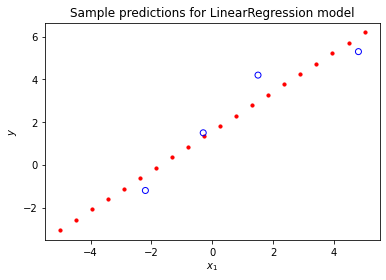

In [2]:
# 1. Define the training set

X = np.array([[1, -2.2],
              [1, -0.3],
              [1,  1.5],
              [1,  4.8]])
y = np.array([-1.2, 1.5, 4.2, 5.3])

#Use the fit_intercept=False option when creating the LinearRegression object, 
#since the  𝑋  matrix already has a column of 1s corresponding to an intercept parameter 

linear_model = sklearn.linear_model.LinearRegression(fit_intercept=False)
linear_model.fit(X, y)

x0 = np.ones(20)                        # A column of 1s so that the bias term w[0] gets added
x1 = np.linspace(-5, 5, 20)             # A column of x values ranging from [-5, 5]
X_test = np.column_stack([x0, x1])      # A 20x2 matrix where X[i,:] is the ith x vector
y_test = linear_model.predict(X_test)   # Evaluate all x values
plt.scatter(x1, y_test, 10, 'r')
plt.scatter(X[:,1], y, edgecolor='b', facecolor='none')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Sample predictions for LinearRegression model");

### 2. Logistic regression

In this section, I implement the logistic regression, and to compare the results to applying the scikit-learn LogisticRegression** model.

The basic logistic regression training objective (learning objective) is:
$$
\ell_\text{LR}(\mathbf{w}) = \sum_{i=1}^N y_i \ln \sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i) \ln \left(1-\sigma(\mathbf{w}^T \mathbf{x}_i)\right)
$$

The "basic" gradient for the above training objective is on a slide titled "Maximum likelihood estimate for LR":
$$
\nabla \ell_\text{LR}(\mathbf{w}) = \sum_{i=1}^N (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i)\mathbf{x}_i
$$

In [3]:
def sigmoid(z):
    """Returns the element-wise logistic sigmoid of z."""
    # Your code here. Aim for 1 line.
    return 1 / (1 + np.exp(-z))
    
def logistic_model_predict(X, w):
    """
    Returns predictions from logistic model y(x, w) at each point X[i,:] using parameters w.
    Given X with shape (N,D+1), w must have shape (D+1,) and the result will have shape (N,).
    """
    # Your code here. Aim for 1-2 lines.
    return sigmoid(X @ w)

def logistic_regression_grad(X, y, w):
    """Returns the gradient for basic logistic regression."""
    # Your code here. Aim for 1-3 lines.
    return np.sum(X * (sigmoid(X @ w) - y).reshape(-1, 1), axis=0)

def logistic_regression(X, y, w_init, learn_rate=0.05, num_steps=500):
    """
    Fits a logistic model by gradient descent.
    
    If the feature matrix X has shape (N,D) the targets y should have shape (N,)
    and the initial parameters w_init should have shape (D,).
    
    Returns a new parameter vector w that minimizes the negative log likelihood of the targets.
    """
    # Your code here. Aim for 4-5 lines.
    w = w_init
    for i in range(num_steps):
        grad = logistic_regression_grad(X, y, w)
        w = w - learn_rate*grad
    return w

#### Run logistic regression on data and plot the result

Define Numpy arrays that correspond to the following training data:

$$
X = \begin{bmatrix}
1 & -4.1\\
1 & -2.8\\
1 & -0.7\\
1 &  3.5
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
0 \\
0\\
1\\
1
\end{bmatrix}
$$

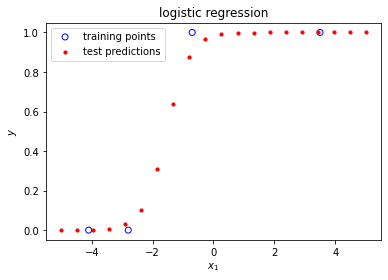

In [4]:
# 1. Define the training set
X = np.array([[1, -4.1],
              [1, -2.8],
              [1, -0.7],
              [1,  3.5]])
y = np.array([0, 0, 1, 1])

# 2. Plot the training set. 
plt.scatter(X[:,1], y, edgecolors='b', facecolors='none', label='training points')

# 3. Run logistic regression on the training set to get 'w'. 
w_init = np.array([0.0, 1.0])
w = logistic_regression(X, y, w_init)

# 4. Define the test set matrix of shape (20,2). 
X_test = np.column_stack([np.ones(20), np.linspace(-5, 5, 20)])

# 5. Use the linear model to make predictions on the test set.
y_test = logistic_model_predict(X_test, w)

# 6. Plot the test predictions. Aim for 1 line, plus a few lines to configure the plot (axis labels etc).
plt.scatter(x1, y_test, 10, 'r', label='test predictions')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("logistic regression")
plt.legend();

#### Run scikit-learn LogisticRegression

The basic algorithm for boosted regression trees can be generalized to the following where the final model is simply a stagewise additive model of b individual regression trees:
$$
\ell_\text{LR}(\mathbf{w}) = \sum_{i=1}^N y_i \ln \sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i) \ln \left(1-\sigma(\mathbf{w}^T \mathbf{x}_i)\right)
$$

The scikit-learn package provides a **LogisticRegression** object to perform logistic regression.

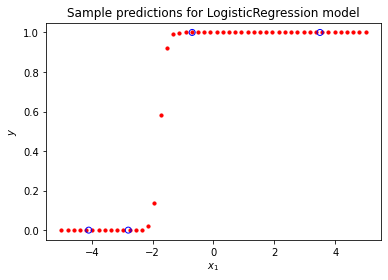

In [5]:
#Create the LogisticRegression object
logistic_model = sklearn.linear_model.LogisticRegression(fit_intercept=False, penalty='none', solver='lbfgs')
logistic_model.fit(X, y);

x0 = np.ones(50)                               # A column of 1s so that the bias term w[0] gets added
x1 = np.linspace(-5, 5, 50)                    # A column of x values ranging from [-5, 5]
X_test = np.column_stack([x0, x1])             # A 20x2 matrix where X[i,:] is the ith x vector
y_test = logistic_model.predict_proba(X_test)  # Evaluate all x values and get two probabilities back (class 0, class 1)
plt.scatter(x1, y_test[:,1], 10, 'r')          # Plot probability of class 1 only
plt.scatter(X[:,1], y, edgecolor='b', facecolor='none')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Sample predictions for LogisticRegression model");

The model parameters (coefficients) found by the LogisticRegression are much larger than those found by the gradient descent solver. That is only because scikit-learn uses a more powerful optimization algorithm and can learn very sharp decision boundaries in fewer steps than mere gradient descent can.

#### Gradient Boosting Machine for non-linear regression

The basic algorithm for boosted regression trees can be generalized to the following where the final model is simply a stagewise additive model of b individual regression trees:
$$
\text{f}(\mathbf{x}) = \sum_{b=1}^B f(\mathbf{w}^b)\
$$

To illustrate the behavior, assume the following x and y observations. The blue sine wave represents the true underlying function and the points represent observations that include some irriducible error (noise). The boosted prediction illustrates the adjusted predictions after each additional sequential tree is added to the algorithm. Initially, there are large errors which the boosted algorithm improves upon immediately but as the predictions get closer to the true underlying function you see each additional tree make small improvements in different areas across the feature space where errors remain. Towards the end of the gif, the predicted values nearly converge to the true underlying function.

![title](img/boosted_stumps.gif)
[Source: https://github.com/bgreenwell]

The scikit-learn library provides the gradient boosting models algorithm for regression via the **GradientBoostingRegressor**.
The example below first evaluates a GradientBoostingRegressor on the test problem using repeated k-fold cross-validation and reports the mean absolute error. Then a single model is fit on all available data and a single prediction is made.

Below it shows a regression problem with one feature x and the corresponding response y. I draw 100 training data points by picking an x coordinate uniformly at random, evaluating the ground truth (sinoid function; light blue line) and then adding some random gaussian noise. In addition to the 100 training points (blue) I also draw 100 test data points (red) which we will use the evaluate our approximation.

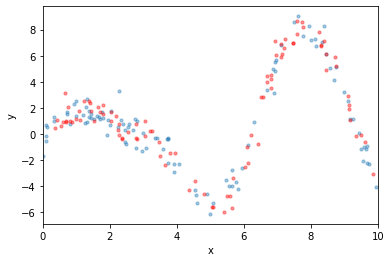

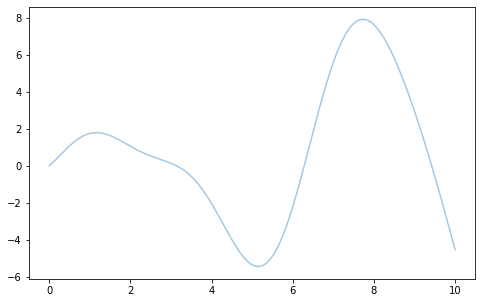

In [6]:
def ground_truth(x):#Ground truth -- function to approximate
    return x * np.sin(x) + np.sin(2 * x)
def gen_data(n_samples=200): # generate training and testing data"""
    np.random.seed(13)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)
# plot ground truth
x_plot = np.linspace(0, 10, 500)
def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')

# plot training and testing data
plt.scatter(X_train, y_train, s=10, alpha=0.4)
plt.scatter(X_test, y_test, s=10, alpha=0.4, color='red')
plt.xlim((0, 10))
plt.ylabel('y')
plt.xlabel('x')

plot_data(figsize=(8, 5))

If I fit an individual regression tree to the above data, I get a piece-wise constant approximation. The deeper I grow the tree, the more constant segments I can accommodate and thus, the more variance I can capture. The scikit-learn gradient boosting estimators allow we to evaluate the prediction of a model as a function of the number of trees via the **staged_(predict|predict_proba)** methods. These return a generator that iterates over the predictions as we add more and more trees.

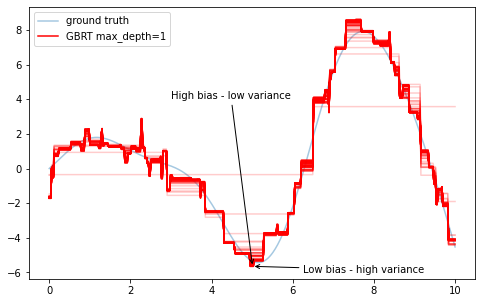

In [7]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from itertools import islice
plot_data()
est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)
ax = plt.gca()
first = True
# step over prediction as we added 20 more trees.
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, 1000, 10):
    plt.plot(x_plot, pred, color='r', alpha=0.2)
if first:
    ax.annotate('High bias - low variance', xy=(x_plot[x_plot.shape[0] // 2],
                                                pred[x_plot.shape[0] // 2]),
                xycoords='data',
                xytext=(3, 4), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc"))
    first = False
    pred = est.predict(x_plot[:, np.newaxis])

plt.plot(x_plot, pred, color='r', label='GBRT max_depth=1')

ax.annotate('Low bias - high variance', xy=(x_plot[x_plot.shape[0] // 2],

                                            pred[x_plot.shape[0] // 2]),
            xycoords='data', xytext=(6.25, -6),
            textcoords='data', arrowprops=dict(arrowstyle="->",
                                               connectionstyle="arc"))
plt.legend(loc='upper left')

The above plot shows 50 red lines where each shows the response of the GBRT model after 20 trees have been added. It starts with a very crude approximation that can only fit more-or-less constant functions (i.e. High bias – low variance) but as we add more trees the more variance our model can capture resulting in the solid red line.
We can see that the more trees we add to our GBRT model and the deeper the individual trees are the more variance we can capture thus the higher the complexity of our model. But as usual in machine learning model complexity comes at a price — overfitting.

## <center>Part II. A real world data set</center>

## Introduction

Residential house price prediction can help real estate agents and customers make decisions for various purposes, such as providing guidance to online sellers and buyers.
This exercise is to predict the final price of a house given 79 explanatory variables that describe almost all aspects of a house in Ames, Iowa. The data set is from a Kaggle playground competition (https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

## Objective and strategy 

Related tasks include:

• Exploratory data analysis – understanding the data landscape, such as the type of features,
missing values of different features, outliers and data skewness

• Feature processing  – accordingly, using the insights obtained from the exploratory data analysis, potentially including feature transformation and type transformation, outlier detection and imputation before to establish an eligiable model

• Benchmark modeling – creating a model using a standard technique for the problem in order to set up a benchmark for further modeling improvement

• Model improvement – modifying individual model structure and tuning the hyperparameters to improve its performance, and furthermore stacking/sequential aggregating individual predictors using ensemble learning technique to get better predictions.

## Materials and methods

### Load data and libraries:

In [8]:
# download the data directly and upload to local file folder 
# "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"
# Input data files are available in the "../input/" directory.

import numpy as np 
import pandas as pd
df = pd.read_csv('./input/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
import graphviz
import pandas_profiling
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
#from sklearn.utils.fixes import signature
from funcsigs import signature
from matplotlib.legend_handler import HandlerLine2D
from pdpbox import pdp, get_dataset, info_plots

%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


### Exploratory Data Analysis
The training dataset is mixed with categorical and numerical features as well as some missing
values. Specifically, there are 1460 observations, each with 79 features and the sale price
of house. The test dataset has 1461 observations, each with 79 features. This excercise is to predict the
sale price of the test dataset using the model obtained from the training dataset. 

**WARNING: the code below takes quite long time.**

**"House Price data profiling.html"** have been already obtained by "pandas_profiling" and stored in the file folder, visuaizing the exploratory analysis of the data.

In [10]:
# pandas_profiling for simple and fast exploratory data analysis of a Pandas Datafram

#import pandas_profiling

#df.fillna('NA', inplace=True)  # filling missing values

##df.profile_report()
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="House Price data profiling.html")

In more detail, the histogram of the house price below shows that it is skewed. Thus, the log transformation
needs to be performed in order to normalize it.
In the following, we use the Root Mean Squared Logarithmic Error (RMSLE) as evaluation metric, which is defined as 
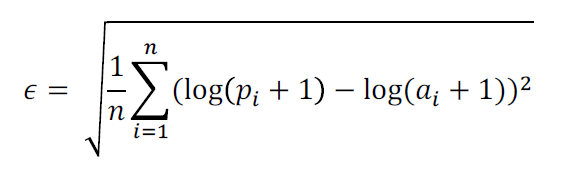
where "n" is the total number of observations, "pi" is the predicted house price, "ai" is the actual house price.

Compared to the Root Mean Squared Error (RMSE), RMSLE does not heavily penalize the huge difference between the predicted and actual values. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally

In [11]:
from sklearn.metrics import make_scorer, mean_squared_error

def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)    

(10.0, 14.0, 0.0, 180.0)

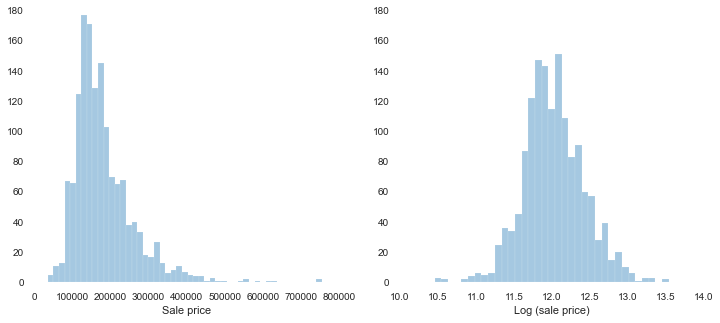

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set up the matplotlib figure
plt.figure(figsize=(12,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(df['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

The correlation matrix between the numerical variables and the sale price shows that several variables that are strongly correlated with the house price.

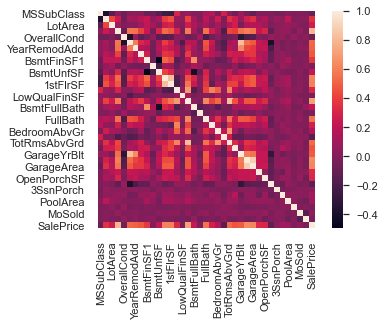

In [13]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [14]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

The top six variables that are highly correlated with the sale price are further investigated.

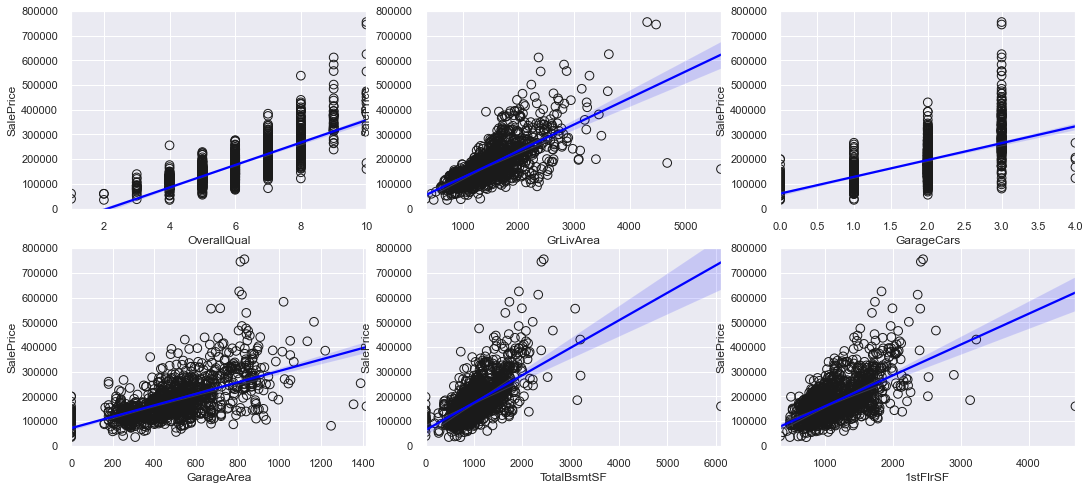

In [15]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = df,scatter=False, color = 'Blue')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

### Data Preprocessing
1) Log transformation skewed features: all features that have a skewness larger than 0.75 are log transformed

2) Categorical features: the "pandas.get_dummies" function converts categorical variables into dummy/indicator variables

3) Outlier detection: all predictions from benchmark that differ more than $1,200 than actual house price are treated as outliers. This standard is somewhat arbitrary but does increase the modelling preformance. All outliers are removed from the trianing dataset

4) Missing values: delete features with big precentages of missing values. The categorical variables with the many missing
values are "Alley", "FirePlaceQu", "PoolQC", "Fenc" and "MiscFeature". In the exploratry analysis, there are some features that are highly correlated with the sale price. We treat some of these features as redundant variables and delete them from the training dataset

In [16]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time
from sklearn import preprocessing
from scipy.stats import skew

train = pd.read_csv("./input/train.csv") # read train data
test = pd.read_csv("./input/test.csv") # read test data

tables = [train,test]
print ("Delete features with big percentages of missing values...")
total_missing = train.isnull().sum()
to_delete = total_missing[total_missing>(train.shape[0]/3.)]
for table in tables:
    table.drop(list(to_delete.index),axis=1,inplace=True)

numerical_features = test.select_dtypes(include=["float","int","bool"]).columns.values
categorical_features = train.select_dtypes(include=["object"]).columns.values

to_delete

Delete features with big percentages of missing values...


Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [17]:
def data_preprocess(train,test):
    outlier_idx = [4,11,13,20,46,66,70,167,178,185,199, 224,261, 309,313,318, 349,412,423,440,454,477,478, 523,540, 581,588,595,654,688, 691, 774, 798, 875, 898,926,970,987,1027,1109, 1169,1182,1239, 1256,1298,1324,1353,1359,1405,1442,1447]
    train.drop(train.index[outlier_idx],inplace=True)
    all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                          test.loc[:,'MSSubClass':'SaleCondition']))
    
    to_delete = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    all_data = all_data.drop(to_delete,axis=1)

    train["SalePrice"] = np.log1p(train["SalePrice"])
    #log transform skewed numeric features
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_feats = skewed_feats.index
    all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
    all_data = pd.get_dummies(all_data)
    all_data = all_data.fillna(all_data.mean())
    X_train = all_data[:train.shape[0]]
    X_test = all_data[train.shape[0]:]
    y = train.SalePrice

    return X_train,X_test,y

## Results & Discusion

### Benchmark modeling

The Random Forest regression is selected as our benchmark model. The default parameters in scikit-learn package are used as the benchmark, which earns a local cross validation score of 0.138194 and 0.15702 on the public leaderboard.

### Model improvement

#### ML-algorithms

Before appling the ensemble learning approach, I trained four base models, i.e.,

(1) Random Forest regressor; 
(2) Extra Trees regressor; 
(3) Gradient Boosting regressor; 
(4) Extreme Gradient Boosting regressor. 

The four base models will be used next to form model library as first level model. Then I use the "Ridge Regression" as second level model, for which the predictions from the first level model are used as the new features.  
![title](img/1.png)

### Base Models

In [18]:
import datetime

def create_submission(prediction,score):
    now = datetime.datetime.now()
    sub_file = 'submission_'+str(score)+'_'+str(now.strftime("%Y-%m-%d-%H-%M"))+'.csv'
    print ('Creating submission: ', sub_file)
    pd.DataFrame({'Id': test['Id'].values, 'SalePrice': prediction}).to_csv(sub_file, index=False)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import skew
from sklearn.model_selection import ShuffleSplit

#### Random Forest regressor

Every decision tree has high variance. A main drawback of decision trees is that they tend to overfit the training data.  When we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. 

A Random Forest is an ensemble technique with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

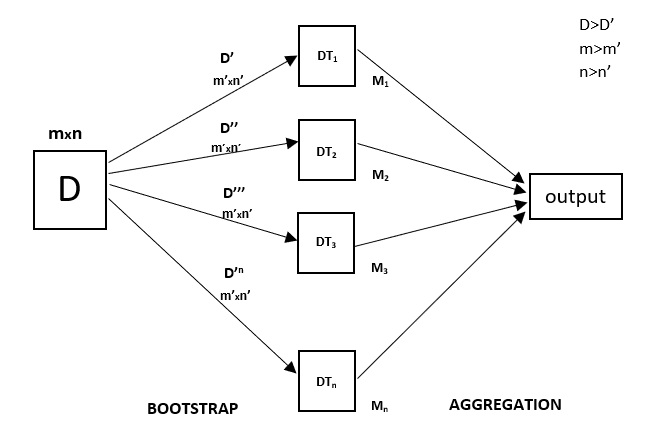

To build a tree, we have to define some hyperparameters:
(1) the number of trees to build, the "n_estimators" parameter of RandomForestRegressor; (2) 
we first take what is called a bootstrap sample of our data. That is, from our n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times), n_samples times. This will create a dataset
that is as big as the original dataset, but some data points will be missing from it
(approximately one third), and some will be repeated.

The important hyperparameters to adjust are (1) "n_estimators",(2) "max_features", and (3) "max_depth". 

For "n_estimators", larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.” 
In this work, I choose n_estimators=500.

A high "max_features" means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.
In this work, I choose a series of "max_features" values [10,15,20,25] and a series of "max_depth" values [3,5,7,9,11] to understand how these tunable parameters affect predictions.





In [20]:
def model_random_forecast(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    rfr = RandomForestRegressor(n_jobs=1, random_state=0)
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20,25], 'max_depth':[3,5,7,9,11]}
    model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Random forecast regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

#### Extra Trees regressor

When we are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds. A forest of such extremely random trees is an Extremely Randomized
Trees ensemble (Extra-Trees). Once again, this trades more bias for a lower variance. It also makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.

Similarily, the important hyperparametersto adjust are (1) "n_estimators" (2) "max_features"

In [21]:
def model_extra_trees_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    
    etr = ExtraTreesRegressor(n_jobs=1, random_state=0)
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}
    model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Extra trees regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

#### GradientBoostingRegressor

The gradient boosted regression tree (for a large-scale problem, it might be worth looking into the "xgboost") is another ensemble method that combines multiple decision trees to create a more powerful model. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster. The main idea behind gradient boosting is to combine many simple models, like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance. 

Apart from the pre-pruning and the number of trees in the ensemble, another important tunable parameter is the (1)"learning_rate", which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing (2)"n_estimators", also increases the model complexity, as the model has more chances to correct mistakes on the training set. Another important parameter is (3) "max_depth", to reduce the complexity of each tree. Usually max_depth is set very low for gradient boosted models, often not deeper than five splits.

As with other tree-based models, it also often does not work well on high-dimensional sparse data.

In [22]:
def model_gradient_boosting_tree(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    gbr = GradientBoostingRegressor(random_state=0)
    param_grid = {
 #       'n_estimators': [500],
 #       'max_features': [10,15],
#'max_depth': [6,8,10],
 #       'learning_rate': [0.05,0.1,0.15],
  #      'subsample': [0.8]
    }
    model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Gradient boosted tree regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

####  XGB regressor

In [23]:
def model_xgb_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    
    xgbreg = xgb.XGBRegressor(seed=0)
    param_grid = {
#        'n_estimators': [500],
#        'learning_rate': [ 0.05],
#        'max_depth': [ 7, 9, 11],
#        'subsample': [ 0.8],
#        'colsample_bytree': [0.75,0.8,0.85],
    }
    model = GridSearchCV(estimator=xgbreg, param_grid=param_grid, n_jobs=1, cv=10, scoring=RMSE)
    model.fit(X_train, y_train)
    print('eXtreme Gradient Boosting regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

### Tuning parameters

Model refinement is conducted using the grid search technique. For the learning purpose, I use a few tunable parameters shown in the following (the detailed grid range can be found in above code). 
Before starting to tune the parameters, I just use the scikit-learn default parameter values for each model. After the refinement of the base models, stacking technique is used to ensemble them together to imporve final prediction performance

**WARNING: the code below takes a couple of minutes**

In [24]:
# read data, build model and do prediction
#train = pd.read_csv("../../input/train.csv") # read train data
train = pd.read_csv("./input/train.csv") # read train data
test = pd.read_csv("./input/test.csv") # read test data
Xtrain,Xtest,ytrain = data_preprocess(train,test)


test_predict_random_forecast,score_random_forecast = model_random_forecast(Xtrain,Xtest,ytrain)
create_submission(np.exp(test_predict_random_forecast),score_random_forecast)

test_predict_extra_tree,score_extra_tree = model_extra_trees_regression(Xtrain,Xtest,ytrain)
create_submission(np.exp(test_predict_extra_tree),score_extra_tree)

test_predict_gradient_boosting_tree,score_gradient_boosting_tree = model_gradient_boosting_tree(Xtrain,Xtest,ytrain)
create_submission(np.exp(test_predict_gradient_boosting_tree),score_gradient_boosting_tree)

test_predict_xgb_regression,score_xgb_regression = model_xgb_regression(Xtrain,Xtest,ytrain)
create_submission(np.exp(test_predict_xgb_regression),score_xgb_regression)

Random forecast regression...
Best Params:
{}
Best CV Score:
0.13087473118087273
Creating submission:  submission_0.13087473118087273_2020-06-07-06-41.csv
Extra trees regression...
Best Params:
{}
Best CV Score:
0.12884710486571904
Creating submission:  submission_0.12884710486571904_2020-06-07-06-43.csv
Gradient boosted tree regression...
Best Params:
{}
Best CV Score:
0.11299763387193003
Creating submission:  submission_0.11299763387193003_2020-06-07-06-44.csv
eXtreme Gradient Boosting regression...
Best Params:
{}
Best CV Score:
0.12643399063708205
Creating submission:  submission_0.12643399063708205_2020-06-07-06-45.csv


## Ensemble Model

The base models should be as unrelated as possible. Some of the base models are used only with their scikit-learn default
parameter values without fine tuning. There are two challenges. One is that we need to make sure the features for the final second level model are based on the predictions of the first level base models. Another is how exactly we choose the base models. This is a tricky but the rule of thumb in this work is that I choose the ones that improve the local score with the assumption that the local and public score has a good correlation.

The basic idea of stacking is to use another model or “stacker” to combine all previous model predictions in order to reduce the generalization error. 
An illustration of stacking approach is shown below. Each of the bottom predictors predicts a different value, and then the final predictor (a blender, or a meta learner) takes these predictions as inputs and makes the final prediction.

First, the training dataset need to be split into k folds. Second, we iterate over this k folds training dataset. In each iteration, each base model will be trained using k-1 folds and predict on the hold out fold. At the same time, each base model also need to provide a prediction on the entire test dataset. After the iteration over all folds, we will have the prediction
of the entire training dataset for each model and k copies of the prediction of the entire test dataset for each model. Finally, we train second level model, or stacker, using the prediction in the training dataset as new features and use the average of the k copies of the test dataset predictions as the test input for the trained model to provide the final prediction.

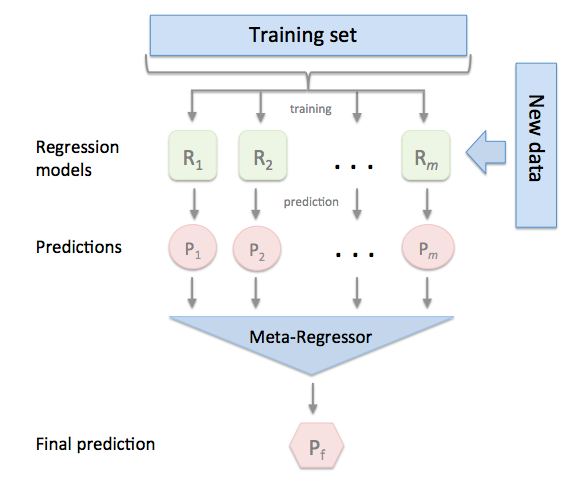

An illustration of stacking approach: predictions in a multilayer stacking ensemble [http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/]

In [25]:
from sklearn.model_selection import KFold


class ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models
    
    
    def fit_predict(self,train,test,ytr):
        X = train.values
        y = ytr.values
        T = test.values        
        
        folds = KFold(n_splits=self.n_splits,shuffle=False, random_state = 0)
        #create k-fold cross validation iterator
        #folds =  list(KFold(len(y), n_splits=self.n_splits,shuffle = True, random_state = 0))
        
    # folds = list(KFold(len(y), n_folds = self.n_folds, shuffle = True, random_state = 0))
        
        S_train = np.zeros((X.shape[0],len(self.base_models)))
        S_test = np.zeros((T.shape[0],len(self.base_models))) # X need to be T when do test prediction
        
        
        for i,reg in enumerate(base_models):
            print ("Fitting the base model...")
            S_test_i = np.zeros((T.shape[0],self.n_splits)) # X need to be T when do test prediction
            #for j, (train_idx,test_idx) in enumerate(folds):
            # For iterate over the folds just use split
            #for train_idx, test_idx in folds.split(X):
            for j, (train_idx, test_idx) in enumerate(folds.split(X)):
                print('Iteration:', j)
            
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                reg.fit(X_train,y_train)
                y_pred = reg.predict(X_holdout)[:]
                S_train[test_idx,i] = y_pred
                S_test_i[:,j] = reg.predict(T)[:]
            #    S_test_i[:,j] = reg.predict(X)[:]
            S_test[:,i] = S_test_i.mean(1)
        
        print ("Stacking base models...")
        param_grid = {
             'alpha': [1e-3,5e-3,1e-2,5e-2,1e-1,0.2,0.3,0.4,0.5,0.8,1e0,3,5,7,1e1,2e1,5e1],
        }
        grid = GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, scoring=RMSE)
        grid.fit(S_train, y)
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        y_pred = grid.predict(S_test)[:]
        return y_pred, -grid.best_score_


In [26]:
train = pd.read_csv("./input/train.csv") # read train data
test = pd.read_csv("./input/test.csv") # read test data

**Ridge regression** is a linear model with an additional penalty factor that is proportional to the weights of the model.  
The idea is that ridge regression will try to keep the weights as small as possible, in order to reduce the variance of the model and make it less prone to overfitting. Formally, we will try to compute the quantity:

$$\arg\min_{\beta,\ \lambda} (y - X\beta)^T(y - X\beta) + \lambda\lVert\beta\rVert^2_2$$

where $\lambda$ is the penalty coefficient assigned to the weights, and is multiplied by the $L2$ norm of the weights.

**WARNING: the code below takes around ten minutes!!!**

In [27]:
# build a model library (can be improved)
base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=18, max_depth=11
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
            n_estimators=500, max_features=20
        ),
        GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=10, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=7,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
    ]

stack = ensemble(
        n_splits=10,
        stacker=Ridge(),
        base_models=base_models
    )

X_train,X_test,y_train = data_preprocess(train,test)
y_pred, score = stack.fit_predict(X_train,X_test,y_train)

create_submission(np.expm1(y_pred),score)

Fitting the base model...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Fitting the base model...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Fitting the base model...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Fitting the base model...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Stacking base models...
Param grid:
{'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 3, 5, 7, 10.0, 20.0, 50.0]}
Best Params:
{'alpha': 0.2}
Best CV Score:
0.10658305098704342
Best estimator:
Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Creating submission:  submis

## Conclusion 

One interesting observation during the model ensembling process is that increasing the size of the model library can potentially increase the validation score. In this study, a variety of base models were tested in the model library with their scikit-learn default parameter values. The approach is somewhat brutal and a more elegant way is to find the base models as uncorrelated as possible. 
Additionally, the ensemble approach in this study further improves the performance of prediction.
The scores using different models are summarized by the figure below.
![title](img/3.jpg)

## Bibliography

1. Learning From Data - Online Corse (MOOC)  https://work.caltech.edu/telecourse

2. Hands-On Machine Learning with Scikit-Learn & TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. By Aurélien Géron.

3. Introduction to Machine Learning with Python: A Guide for Data Scientists. By Andreas C. Müller and Sarah Guido.